<a href="https://colab.research.google.com/github/yuguerten/Royal-Air-Maroc-Customer-Review-Sentiment-Analyzer-using-NLP/blob/master/Royal_Air_Maroc_Sentiment_Explorer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [2]:
reviews = pd.read_csv('reviews_air_maroc.csv',encoding='latin-1')

In [3]:
reviews.head()

,Review,Review_Length
0,casablanca to laayoune morocco and casablanca ...,594
1,london gatwick to agadir via casablanca on the...,2536
2,i just had a short flight from casablanca to m...,227
3,casablancamunich after horrible experience of ...,419
4,not impressed at all i flew from london heathr...,716


In [ ]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Review         192 non-null    object
 1   Review_Length  192 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.1+ KB


In [4]:
nltk.downloader.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [6]:
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 1.0 MB/s eta 0:00:00


In [7]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [8]:
reviews.drop('Review_Length',axis=1,inplace=True)

In [9]:
reviews

,Review
0,casablanca to laayoune morocco and casablanca ...
1,london gatwick to agadir via casablanca on the...
2,i just had a short flight from casablanca to m...
3,casablancamunich after horrible experience of ...
4,not impressed at all i flew from london heathr...
...,...
187,the worst airlines i have ever flown the fligh...
188,we had no problems in terms of flight times or...
189,i have flown with royal air maroc over times...
190,jfk to casablanca delayed hours with no commu...


In [11]:
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

reviews['Sentiment'] = reviews['Review'].apply(vadersentimentanalysis)


def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
reviews['Analysis'] = reviews['Sentiment'].apply(vader_analysis)
reviews.head()

,Review,Sentiment,Analysis
0,casablanca to laayoune morocco and casablanca ...,-0.8316,Negative
1,london gatwick to agadir via casablanca on the...,-0.9770,Negative
2,i just had a short flight from casablanca to m...,0.6293,Positive
3,casablancamunich after horrible experience of ...,0.9708,Positive
4,not impressed at all i flew from london heathr...,-0.9716,Negative


In [13]:

analysis = reviews['Analysis'].value_counts()
analysis

Negative    121
Positive     55
Neutral      16
Name: Analysis, dtype: int64

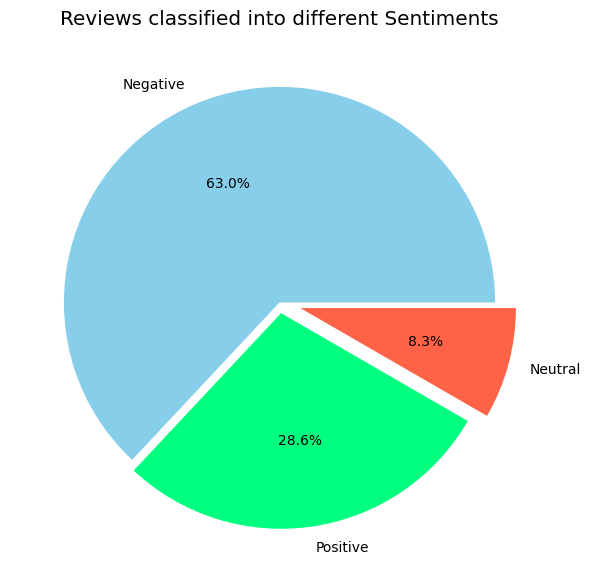

In [14]:

plt.figure(figsize=(25,7))
plt.subplot(1,3,2)
plt.title("Reviews classified into different Sentiments")
plt.pie(analysis.values, labels = analysis.index, explode = (0, 0.05, 0.1), autopct='%1.1f%%', shadow=False , colors=("skyblue", "springgreen", "tomato"))
plt.show()


In [15]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud

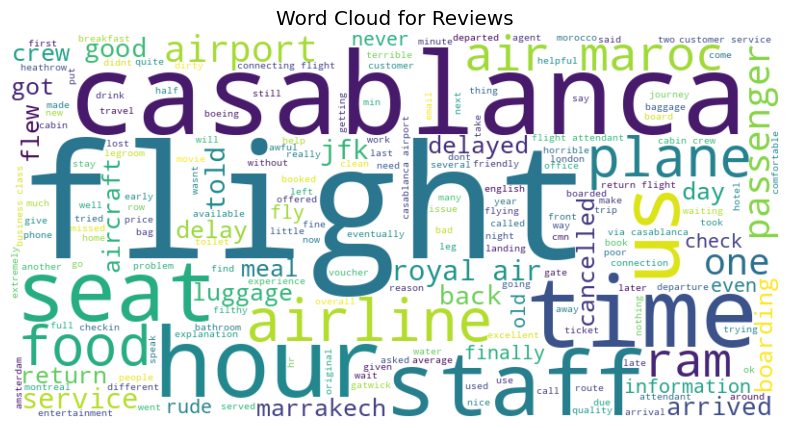

In [16]:
# Tokenize and preprocess the reviews again for creating word cloud
text = ' '.join(reviews['Review'].tolist())

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Reviews')
plt.show()

In [ ]:
reviews